In [1]:
import pandas as pd
import numpy as np

データの読み込み

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


学習データを特徴量と目的変数に分ける

In [4]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']

#テストデータは特徴量のみなのでそのまま
test_x = test.copy()

データの揺れ(型)を確認する

In [5]:
train_x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

データの欠損値の確認をする

In [6]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

####  変数の削除をする

In [8]:
#変数PassengeerIdを削除する
train_x = train_x.drop(['PassengerId'],axis=1)
test_x = test_x.drop(['PassengerId'],axis=1)

## データの確認

年齢の分布を確認

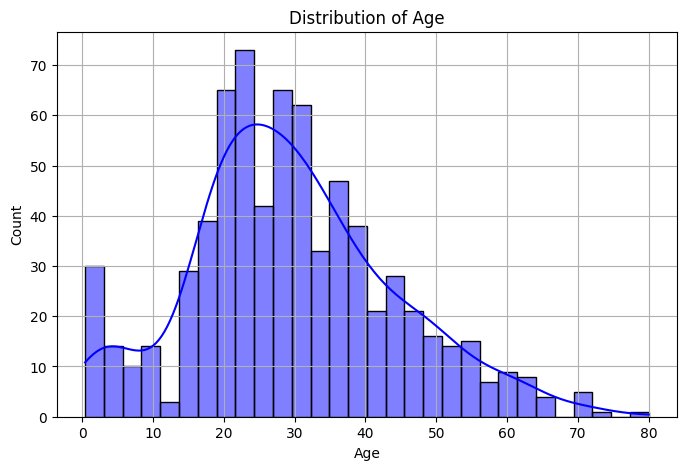

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train_x['Age'], bins=30, kde=True, color='blue')  # KDE=Trueで確率密度関数も描画
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

NaNが2つ以上ある行を確認

In [10]:
nan_rows = train_x[train_x.isna().sum(axis=1) >= 2]
print(nan_rows)
#3個あるものはなかった

     Pclass                                      Name     Sex  Age  SibSp  \
5         3                          Moran, Mr. James    male  NaN      0   
17        2              Williams, Mr. Charles Eugene    male  NaN      0   
19        3                   Masselmani, Mrs. Fatima  female  NaN      0   
26        3                   Emir, Mr. Farred Chehab    male  NaN      0   
28        3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0   
..      ...                                       ...     ...  ...    ...   
859       3                          Razi, Mr. Raihed    male  NaN      0   
863       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8   
868       3               van Melkebeke, Mr. Philemon    male  NaN      0   
878       3                        Laleff, Mr. Kristo    male  NaN      0   
888       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
5        0      330877   8

ただ乗りしている人がいる！？

In [11]:
fare_zero_rows = train_x[train_x['Fare'] == 0]
print(fare_zero_rows)

     Pclass                              Name   Sex   Age  SibSp  Parch  \
179       3               Leonard, Mr. Lionel  male  36.0      0      0   
263       1             Harrison, Mr. William  male  40.0      0      0   
271       3      Tornquist, Mr. William Henry  male  25.0      0      0   
277       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0   
302       3   Johnson, Mr. William Cahoone Jr  male  19.0      0      0   
413       2    Cunningham, Mr. Alfred Fleming  male   NaN      0      0   
466       2             Campbell, Mr. William  male   NaN      0      0   
481       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0   
597       3               Johnson, Mr. Alfred  male  49.0      0      0   
633       1     Parr, Mr. William Henry Marsh  male   NaN      0      0   
674       2        Watson, Mr. Ennis Hastings  male   NaN      0      0   
732       2              Knight, Mr. Robert J  male   NaN      0      0   
806       1            An

In [12]:
#train_x2 = train_x.copy()
#train_y2 = train_y.copy()
#test_x2 = test_x.copy()

## 特徴量の作成

### 行のNaNの数の特徴量を作成する

In [13]:
#train_x["num_missing"] = train_x.isna().sum(axis=1)
#test_x["num_missing"] = test_x.isna().sum(axis=1)

### Fareが０の特徴量の列の作成

In [14]:
#使えなかった
train_x["fare_zero"] = (train_x['Fare'] == 0).astype(int)
test_x["fare_zero"] = (test_x['Fare'] == 0).astype(int)

### Cabinから新たな特徴量を作成する

In [15]:
train_x['Cabin_Deck'] = train_x['Cabin'].astype(str).str[0]
train_x.loc[train_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

test_x['Cabin_Deck'] = test_x['Cabin'].astype(str).str[0]
test_x.loc[test_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

print(train_x['Cabin_Deck'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Deck, Length: 891, dtype: object


### Name列からタイトルを抽出

In [16]:
# Name列からタイトルを抽出
train_x['Title'] = train_x['Name'].str.extract(r',\s*([^\.]+)\.')
test_x['Title'] = test_x['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを結合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
train_x['Title'] = train_x['Title'].replace(rare_titles,'Rare')
test_x['Title'] = test_x['Title'].replace(rare_titles,'Rare')

print(train_x['Title'].value_counts())
print(test_x['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


### 家族人数の特徴量の作成をする

In [17]:
#家族人数の合計
train_x['FamilySize'] = train_x['SibSp'] + train_x['Parch'] + 1
test_x['FamilySize'] = test_x['SibSp'] + test_x['Parch'] + 1

### 料金/家族人数の特徴量を作成する

In [18]:
train_x['FarePerFamilyMember'] = train_x['Fare'] / train_x['FamilySize']
test_x['FarePerFamilyMember'] = test_x['Fare'] / train_x['FamilySize']

train_x['FarePerFamilyMember']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerFamilyMember, Length: 891, dtype: float64

### LastNameの特徴量を作成する

In [19]:
#姓(LastName)を抽出して新しい列に追加
train_x['LastName'] = train['Name'].str.split(',').str[0]
test_x['LastName'] = test['Name'].str.split(',').str[0]

In [20]:
train_x['LastName'].value_counts()

LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

### LastNameからSameNameの列を作成する

In [21]:
#LastNameの登場回数を記録
train_x['Same_Name'] = train_x['LastName'].map(train_x['LastName'].value_counts())
test_x['Same_Name'] = test_x['LastName'].map(test_x['LastName'].value_counts())

### Ticketから特徴量を作る

In [22]:
def classify_ticket(ticket):
    #  1. Numeric（すべて数値）
    if ticket.isdigit():
        return "Numeric"
    
    #  2. SpecialChar（"/" や "." を含む場合）
    elif "/" in ticket or "." in ticket:
        return "SpecialChar"
    
    #  3. Alphanumeric（英字と数字の両方を含む場合）
    elif any(char.isdigit() for char in ticket) and any(char.isalpha() for char in ticket):
        return "Alphanumeric"
    
    #  4. Unknown（どれにも当てはまらない場合）
    else:
        return "Unknown"

In [23]:
train_x["Ticket_Tpye"] = train_x["Ticket"].apply(classify_ticket)
test_x["Ticket_Tpye"] = test_x["Ticket"].apply(classify_ticket)
print(train_x['Ticket_Tpye'].value_counts())

Ticket_Tpye
Numeric         661
SpecialChar     150
Alphanumeric     76
Unknown           4
Name: count, dtype: int64


In [24]:
#正しく分類できているか確認
train_x[train_x["Ticket_Tpye"] == "SpecialChar"]["Ticket"]

0             A/5 21171
2      STON/O2. 3101282
12            A/5. 2151
33           C.A. 24579
37           A./5. 2152
             ...       
866       SC/PARIS 2149
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 150, dtype: object

### 子どもだけの特徴量を作成したい

In [25]:
#妻から夫を算出
filtered_rows = train_x[(train_x["Title"] == "Mrs") & (train_x["SibSp"] == 1)]
print(filtered_rows)

     Pclass                                               Name     Sex   Age  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
18        3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
25        3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
..      ...                                                ...     ...   ...   
849       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN   
854       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   
856       1         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0   
871       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874       2              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   

     SibSp  Parch     Ticket      Fare 

### 子か親の欄を2人いる時は親だと仮定して特徴量の作成

In [26]:
#train_x['Parch_child'] = (train_x['Parch']==2) & ((train_x['Title'] == 'Miss') | (train_x['Parch'] == 'Master'))
#train_x

### Ageデータの結合

In [27]:
train_cabin_data = pd.read_csv('cabin_data/train_cabin_data1.csv')
test_cabin_data = pd.read_csv('cabin_data/test_cabin_data1.csv')

train_x = pd.concat([train_x,train_cabin_data['Predict_Cabin']],axis=1)
test_x = pd.concat([test_x,test_cabin_data['Predict_Cabin']],axis=1)

### Ageを二値に分類

In [28]:
train_x['Age_missing'] = train_x['Age'].isnull().astype(int)
test_x['Age_missing'] = test_x['Age'].isnull().astype(int)

### Cabinデータ結合

In [29]:
train_age_data = pd.read_csv('age_data/train_age_data1.csv')
test_age_data = pd.read_csv('age_data/test_age_data1.csv')

train_x = pd.concat([train_x,train_age_data['Predict_Age']],axis=1)
test_x = pd.concat([test_x,test_age_data['Predict_Age']],axis=1)

In [30]:
train_x['Cabin_missing'] = train_x['Cabin_Deck'].isnull().astype(int)
test_x['Cabin_missing'] = test_x['Cabin_Deck'].isnull().astype(int)

### LastNameの長さから特徴量を作成する

In [31]:
# 名前の長さを特徴量として追加
train_x['LastName_length'] = train_x['LastName'].apply(len)
test_x['LastName_length'] = test_x['LastName'].apply(len)

# 確認
print(train_x[['LastName', 'LastName_length']].head())

    LastName  LastName_length
0     Braund                6
1    Cumings                7
2  Heikkinen                9
3   Futrelle                8
4      Allen                5


###  最初の文字の特徴量

In [32]:
from sklearn.preprocessing import LabelEncoder
#"""
train_x['LastName_first_char'] = train_x['LastName'].apply(lambda x: str(x)[0])
test_x['LastName_first_char'] = test_x['LastName'].apply(lambda x: str(x)[0])

# 最初の文字をエンコード
for c in ['LastName_first_char']:
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA'))
    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

train_x['LastName_first_char']
#"""

0       1
1       2
2       7
3       5
4       0
       ..
886    12
887     6
888     9
889     1
890     3
Name: LastName_first_char, Length: 891, dtype: int64

### 最終データ確認

In [33]:
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length,LastName_first_char
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,...,3.62500,Braund,2,SpecialChar,7,0,22.0,1,6,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,...,35.64165,Cumings,1,Alphanumeric,2,0,38.0,0,7,2
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,7.92500,Heikkinen,1,SpecialChar,7,0,26.0,1,9,7
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,...,26.55000,Futrelle,2,Numeric,2,0,35.0,0,8,5
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,...,8.05000,Allen,2,Numeric,7,0,35.0,1,5,0


In [34]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length,LastName_first_char
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,3.91460,Kelly,1,Numeric,7,0,34.5,1,5,10
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,3.50000,Wilkes,1,Numeric,7,0,47.0,1,6,22
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,9.68750,Myles,1,Numeric,7,0,62.0,1,5,12
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,4.33125,Wirz,1,Numeric,7,0,27.0,1,4,22
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,12.28750,Hirvonen,1,Numeric,7,0,22.0,1,8,7


### 変更した特徴量の削除

In [35]:
#変数を削除する
#train_x = train_x.drop(['Name','Ticket','LastName','Cabin' ],axis=1)
#test_x = test_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)

In [36]:
#変数を削除する
train_x = train_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)
test_x = test_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)

### one-hot encodingを行う

In [37]:
"""
# One-hot encoding
for c in ['Title','Sex','Ticket_Tpye']:
    combined = pd.concat([train_x[c], test_x[c]], axis=0)
    combined_dummies = pd.get_dummies(combined, prefix=c)
    
    train_x = train_x.join(combined_dummies[:len(train_x)])
    test_x = test_x.join(combined_dummies[len(train_x):])

    train_x.drop(c, axis=1, inplace=True)
    test_x.drop(c, axis=1, inplace=True)
#"""

"\n# One-hot encoding\nfor c in ['Title','Sex','Ticket_Tpye']:\n    combined = pd.concat([train_x[c], test_x[c]], axis=0)\n    combined_dummies = pd.get_dummies(combined, prefix=c)\n    \n    train_x = train_x.join(combined_dummies[:len(train_x)])\n    test_x = test_x.join(combined_dummies[len(train_x):])\n\n    train_x.drop(c, axis=1, inplace=True)\n    test_x.drop(c, axis=1, inplace=True)\n#"

### label enocdingを行う

In [38]:
from sklearn.preprocessing import LabelEncoder

#for c in ['Embarked','Cabin_Deck']:
for c in ['Embarked','Title','Sex','Ticket_Tpye','Cabin_Deck']:
    #学習データをどう変換するかを決める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA')) #欠損値の変換

    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

In [39]:
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length,LastName_first_char
0,3,1,22.0,1,0,7.2500,3,0,7,2,2,3.62500,2,2,7,0,22.0,1,6,1
1,1,0,38.0,1,0,71.2833,0,0,2,3,2,35.64165,1,0,2,0,38.0,0,7,2
2,3,0,26.0,0,0,7.9250,3,0,7,1,1,7.92500,1,2,7,0,26.0,1,9,7
3,1,0,35.0,1,0,53.1000,3,0,2,3,2,26.55000,2,1,2,0,35.0,0,8,5
4,3,1,35.0,0,0,8.0500,3,0,7,2,1,8.05000,2,1,7,0,35.0,1,5,0


In [40]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier


# XGBoostのパラメータ探索範囲（パラメータを追加）
xgb_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10],
    'max_delta_step': [0, 1, 2],
    'scale_pos_weight': [1, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# LightGBMのパラメータ探索範囲（パラメータを追加）
lgb_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30],
    'max_bin': [100, 200, 300],
    'num_leaves': [31, 63, 127],
    'lambda_l1': [0, 0.1, 1],
    'lambda_l2': [0, 0.1, 1],
    'min_split_gain': [0, 0.1, 0.2],
    'boosting_type': ['gbdt', 'dart', 'goss']
}

# OOF予測を取得する関数
def get_oof_predictions(model, X, y):
    oof_preds = np.zeros(len(X))  # 予測値を格納する配列
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # StratifiedKFoldによる分割
    
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)  # モデルを訓練
        oof_preds[val_idx] = model.predict(X_val)  # 検証データで予測し、OOF予測に格納
        
    return oof_preds

# メタモデルを用いて最終予測を行う関数
def get_final_predictions(meta_model, X, base_models):
    base_preds = np.column_stack([model.predict(X) for model in base_models])  # ベースモデルの予測を列として結合
    final_preds = meta_model.predict(base_preds)  # メタモデルによる最終予測
    return final_preds

# XGBoostの最適化
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(train_x, train_y)

# 最適なパラメータを表示
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best accuracy for XGBoost:", xgb_grid_search.best_score_)


# LightGBMの最適化
lgb_model = lgb.LGBMClassifier()
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
lgb_grid_search.fit(train_x, train_y)

# 最適なパラメータを表示
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best accuracy for LightGBM:", lgb_grid_search.best_score_)

# 最適なパラメータでモデルを再訓練
best_xgb_model = xgb_grid_search.best_estimator_
best_lgb_model = lgb_grid_search.best_estimator_

# 予測を行う
xgb_oof_preds = get_oof_predictions(best_xgb_model, train_x, train_y)
lgb_oof_preds = get_oof_predictions(best_lgb_model, train_x, train_y)

# メタ特徴量を作成
meta_features = np.vstack([xgb_oof_preds, lgb_oof_preds]).T

# メタモデルの訓練
meta_model = LogisticRegression()
meta_model.fit(meta_features, train_y)

# 最終予測を行う
final_preds = get_final_predictions(meta_model, train_x, [best_xgb_model, best_lgb_model])

# 精度を計測
accuracy = accuracy_score(train_y, final_preds)
print(f"Accuracy of stacked model with tuned parameters: {accuracy:.4f}")


Fitting 3 folds for each of 663552 candidates, totalling 1990656 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_delta_step': 1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.9}
Best accuracy for XGBoost: 0.8395061728395062


In [ ]:
# test_xに対する予測を行う
xgb_test_preds = best_xgb_model.predict(test_x)
lgb_test_preds = best_lgb_model.predict(test_x)

# メタ特徴量を作成
meta_test_features = np.column_stack([xgb_test_preds, lgb_test_preds])

# メタモデルで最終予測を行う
final_test_preds = meta_model.predict(meta_test_features)

# 最終予測を表示（または保存）
print("Final predictions on test data:", final_test_preds)

Final predictions on test data: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
best = pd.read_csv('submit/submission_fourth.csv')

In [ ]:
from sklearn.metrics import accuracy_score

# 提出用ファイルの作成
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': final_test_preds
})

# 出力確認
print(submission)

# best['Survived']とpred_labelの1の数を比較
print("best['Survived']の1の数:", best['Survived'].sum())
print("予測結果pred_labelの1の数:", final_test_preds.sum())

accuracy = accuracy_score(best['Survived'], final_test_preds)
print(f"一致している割合（精度）: {accuracy:.4f}")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
best['Survived']の1の数: 150
予測結果pred_labelの1の数: 150
一致している割合（精度）: 0.8708


In [ ]:
# 提出用ファイルの保存（例: 'submission.csv'）
submission.to_csv('submit/submission_24.csv', index=False)